# Tensors  

In [242]:
import torch
import numpy as  np
import math

my_device = 'currentDevice'

In [ ]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
     my_device = torch.device('cpu')

x = torch.rand(2, 2, device=my_device)
print(x)

In [ ]:
data_A = [[2, 1], [2, 0]]
data_B = [[4, 3], [2, 1]]

tensor_A = torch.tensor(data_A)
tensor_B = torch.tensor(data_B)

print(tensor_A)

np_array = np.array(data_A)
x_np = torch.from_numpy(np_array)

print(np_array)

In [ ]:
x_ones = torch.ones_like(tensor_A)
print(f"Ones Tensor: \n{x_ones}")

In [ ]:
tensor = torch.tensor(data_A)

print(f"Tensor datatype: {tensor.dtype}")
print(f"Tensor dimensions: {tensor.shape}")
print(f"Tensor stored in: {tensor.device}")

print(f"\ntensor:\n{tensor}")
print("\nFirst row,", tensor[0])
print("First column,", tensor[...,0])
print("Last column, ", tensor[:,-1])

In [ ]:
# we are concat-ing along the rows for dim = 0 and dim = -2 for a 2x2 tensor
# however, we would concat along the columns for dim = -1 and dim = 1 for a 2x2 tensor
t1 = torch.cat([tensor, tensor_A, tensor_B], dim=1) 


print(t1)

- dim refers to the dimension that we are operating on/along
- dim=1 for a tensor with shape = (2, 3) will operate along the 2nd dimension which are the columns
- when dim < 0, it means how many spaces from the end. At -1, it means last dimension

In [ ]:
data = [[[1,2,3],[4,5,6],[7,8,9]],
        [[1,2,3],[4,5,6],[7,8,9]],
        [[1,2,3],[4,5,6],[7,8,9]]]

data1 = torch.tensor(data)
data2 = torch.clone(data1)
data3 = torch.clone(data1)

t1 = torch.cat([data1, data2, data3], dim=1)
print("The dimensions of data1: ", data1.shape)
print("The dimensions of t1:    ", t1.shape)
print(t1)


How to resolve this issue? There are two tensors that need to be added together. tensor1 = torch.rand(2, 3) and tensor2 = torch.rand(2, 1, 3)

In [ ]:
tensor1 = torch.rand(2, 3)
tensor2 = torch.zeros(2, 1, 3)

tensor2 = torch.squeeze(tensor2)

print(tensor1 + tensor2)

Multiply these tensors to return a tensor with dimensions of torch.Size([1, 2, 3])

tensor1 = torch.rand(1, 2, 3) 
<br>
tensor2 = torch.rand(1, 2)

In [ ]:
tensor1 = torch.rand(1,2,3)
tensor2 = torch.rand(1,2)

tensor2 = torch.unsqueeze(tensor2, list(tensor2.size())[-1])
print((tensor1 * tensor2).size())

# Autograd 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 


Graph the relationship between time and velocity given a travel distance of 250 miles.

Speed at where you will save less than 2 min is at 89 mph


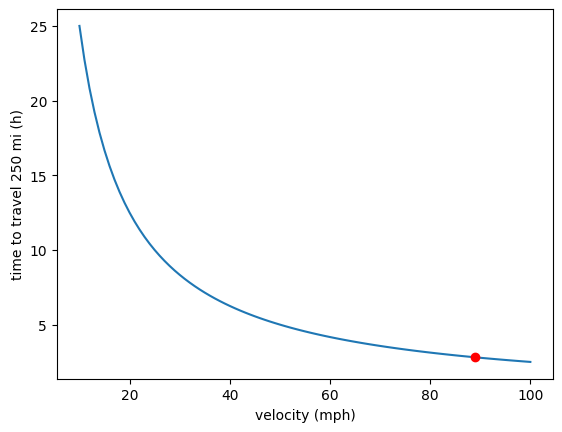

In [4]:
def graph(distance, vel):
    return distance / vel

increments = 100-10+1
distance = torch.tensor([250], dtype = torch.float, requires_grad=True)
vel = torch.linspace(10, 100, increments, requires_grad=True)


relation_graph = graph(distance, vel)

plt.plot(vel.detach(), relation_graph.detach())
plt.xlabel('velocity (mph)')
plt.ylabel(f'time to travel {int(distance)} mi (h)')


time_saved = 2
xpoint = 0
ypoiont = 0
section_size = 2
for x in range(0, len(relation_graph), section_size):
    section = relation_graph[x : x + section_size]
    time = abs(section[-1] - section[0]) * 60
    
    if time < time_saved:
        xpoint = x + section_size + 9
        ypoint = section[-1]
        break


print(f"Speed at where you will save less than {time_saved} min is at {int(xpoint)} mph")
plt.plot(xpoint,ypoint.detach(),'ro')
plt.show()

Reproduce the results but now graph the gradient w.r.t. velocity.

In [ ]:
def graph(distance, vel):
    return distance / vel

increments = 100-10+1

vel = torch.linspace(10, 100, increments, requires_grad=True)
distance = torch.tensor([250], dtype = torch.float, requires_grad=True)

relation_graph = graph(distance, vel)


z = relation_graph.sum()
z.backward()
plt.plot(vel.detach(), vel.grad.detach())

xpoint = 0
ypoint = 0
time_saved = 2
section_size = 1

for x in range(0, len(vel.grad), section_size):

    section = vel.grad[x : x + section_size]
    time = abs((x + section_size + 10) * section[-1] - (x + 10) * section[0])*60
    if  time < time_saved:
        xpoint = x + section_size + 10
        ypoint = section[-1]
        break

print(f"Speed at where you will save less than {time_saved} min is at {int(xpoint)} mph")
plt.plot(xpoint,ypoint,'ro')
plt.xlabel('velocity (mph)')
plt.ylabel('gradient (dt/dv)')
plt.show()



Create a class called Model and use the optimizer to clear the autograd memory

In [232]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_STATE = 100
DIM_OUT = 10

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_STATE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_STATE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = Model()



In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for i in range(0, 10):
    prediction = model(some_input)
    print(prediction)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(loss)

Create a simple decision making model using the following:
- threshold = 1.5
- inputs = torch.tensor([1, 0, 1, 0, 1])
- weights = torch.tensor([0.7, 0.6, 0.5, 0.3, 0.4])

In [1]:
threshold = 1.5
inputs = torch.tensor([1, 0, 1, 0, 1])
weights = torch.tensor([0.7, 0.6, 0.5, 0.3, 0.4])

print((inputs * weights).sum())
print((inputs * weights).sum() > threshold)


NameError: name 'torch' is not defined

## Points Above or Below the Line Model


Create a model that can plot the points above the plotted line as blue points.

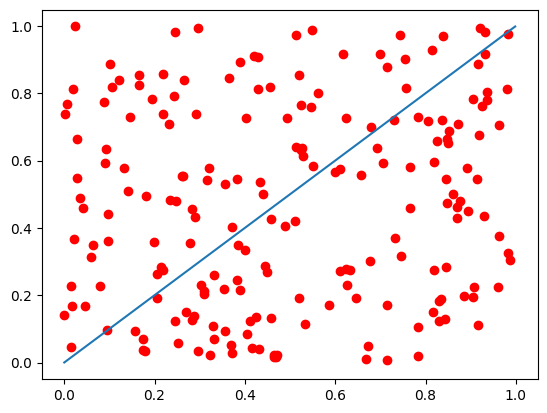

In [5]:
torch.manual_seed(17)
coord = torch.rand(200, 2, requires_grad=True)
coordRange = torch.tensor([coord.min(), coord.max()])

def y_func(x):
    return x

plt.plot(coord[..., 0].detach(), coord[..., 1].detach(), 'ro')
plt.plot(coordRange, y_func(coordRange))
plt.show()

In [27]:
class PointChecker(torch.nn.Module):
    def __init__(self,input_size, hidden_size, output_size):
        super().__init__()
    
        self.layer1 = torch.nn.Linear(input_size, hidden_size,bias=True)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(hidden_size, hidden_size, bias=True)
        self.layer3 = torch.nn.Linear(hidden_size, output_size, bias=True)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        return x.squeeze()
        
def generate_labels(input):
    return (input[..., 1] > y_func(input[..., 0])) * 1.

def train_model(model: torch.nn.Module, data: torch.Tensor, labels: torch.Tensor, loops: int, batch_size: int):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    criterion = torch.nn.BCEWithLogitsLoss()

    for epoch in range(loops):
        indices = torch.randperm(len(data))[:20]
        for i in range(0, len(data), 2):
            batch_data, batch_labels = data[indices], labels[indices]
            model.train()
            optimizer.zero_grad()

            prediction = model(batch_data)       
            loss = criterion(prediction, batch_labels)
            loss.backward()
            optimizer.step()
    
        if (epoch+1)% 100 == 0:
            print(f"Epoch [{epoch}/{loops}, Loss: {loss.item():.4f}]")

def test(model: torch.nn.Module, data: torch.Tensor, loss_fn):
    size = len(data.dataset)
    num_batches = len(data)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in data:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss}:>3f \n")


In [6]:
print(coord.shape[-1])
model = PointChecker(coord.shape[-1], hidden_size=100,output_size=1)
data_label = generate_labels(coord)

train_model(model, coord, data_label, 500, len(coord)) # higher loops can result in the model making more errors
# test(model, coord, )

2


NameError: name 'PointChecker' is not defined

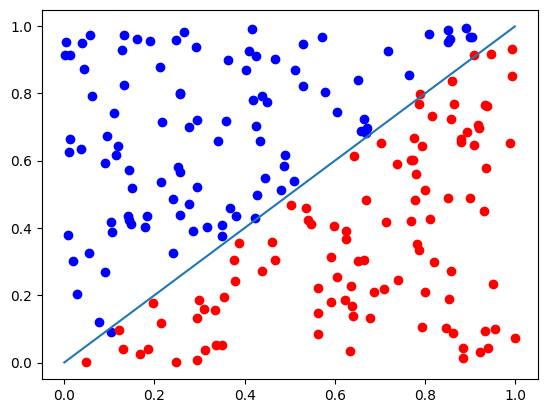

In [66]:
# torch.manual_seed(17)
new_coord = torch.rand(200, 2, requires_grad=True)
coordRange = torch.tensor([coord.min(), coord.max()])

# model.eval()
with torch.inference_mode():
    prediction = model(new_coord)

limiter = 0.5

plt.plot((new_coord[..., 0].detach()[prediction > limiter]), (new_coord[..., 1].detach()[prediction > limiter]), 'bo')
plt.plot((new_coord[..., 0].detach()[prediction < limiter]), (new_coord[..., 1].detach()[prediction < limiter]), 'ro')
plt.plot(coordRange, y_func(coordRange))
plt.show()

# Daniel Bourke practice problems

## Binary Classification

In [7]:
rand = torch.rand(7, 7)
rand.shape

torch.Size([7, 7])

In [8]:
rand2 = torch.rand(1, 7)
torch.matmul(rand, rand2.T)

tensor([[1.5130],
        [1.3617],
        [1.7387],
        [1.3182],
        [1.9666],
        [1.1367],
        [1.5346]])

In [33]:
torch.manual_seed(0)
rand = torch.rand(7, 7)
rand2 = torch.rand(1, 7)
rand.shape

torch.Size([7, 7])

In [34]:
torch.matmul(rand, rand2.T)

tensor([[1.8542],
        [1.9611],
        [2.2884],
        [3.0481],
        [1.7067],
        [2.5290],
        [1.7989]])

In [ ]:
torch.cuda.manual_seed(1234)

In [48]:
torch.manual_seed(1234)
my_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rand3 = torch.rand(2, 3).to(my_device)
rand4 = torch.rand(2, 3).to(my_device)

In [49]:
product = torch.matmul(rand3, rand4.T)
product

tensor([[0.3647, 0.4709],
        [0.5184, 0.5617]])

In [50]:
product.max(), product.min()

(tensor(0.5617), tensor(0.3647))

In [51]:
product.argmax(), product.argmin()

(tensor(3), tensor(0))

In [43]:
torch.manual_seed(7)
rand5 = torch.rand(1, 1, 1, 10)
rand6 = torch.squeeze(rand5)
rand6, rand6.shape


(tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
         0.8513]),
 torch.Size([10]))

## Multiclasssification 

In [254]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from torchmetrics.classification import BinaryAccuracy

SAMPLES = 1000
SEED = 42

data, labels = make_moons(n_samples=SAMPLES, random_state=SEED)

data = torch.from_numpy(data).type(torch.float32)
labels = torch.from_numpy(labels).type(torch.float32)

training_data, testing_data, training_labels, testing_labels = train_test_split(data,
                                                                                labels,
                                                                                test_size=0.2)


In [329]:
class Model(torch.nn.Module):
    def __init__(self, input, output, HIDDEN_UNITS=10):
        super().__init__()
        self.sequence = torch.nn.Sequential(
            torch.nn.Linear(input, HIDDEN_UNITS),
            torch.nn.ReLU(),
            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
            torch.nn.ReLU(),
            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
            torch.nn.ReLU(),
            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
            torch.nn.ReLU(),
            torch.nn.Linear(HIDDEN_UNITS, output),
        )
    
    def forward(self, x):
        return self.sequence(x)
    
def train_model(model: torch.nn.Module, data: torch.Tensor, label: torch.Tensor, loops: int):
    loss_fn = torch.nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    model.train()

    for epoch in range(loops):
        optimizer.zero_grad()
        logits = model(data).squeeze()
        loss = loss_fn(logits, label)
        loss.backward()
        optimizer.step()

        if (epoch+1) % (10) == 0:
            metric = BinaryAccuracy()
            pred = torch.sigmoid(logits).squeeze()
            accuracy = metric(pred, label) * 100

            print(f"Ran {epoch+1} loops | loss: {loss.item()} | Training Data Accuracy: {accuracy:.2f}%")

def test_model(model: torch.nn.Module, data: torch.Tensor, label: torch.Tensor,):
    model.eval()
    metric = BinaryAccuracy()

    with torch.inference_mode():
        test_logits = model(data)
    
    pred = torch.sigmoid(test_logits).squeeze()
    accuracy = metric(pred, label) * 100

    print(f"Testing Data Accuracy: {accuracy:.2f}%")

def plot_decision_boundaries(model: torch.nn.Module, data: torch.Tensor, labels: torch.Tensor):
    """ Plots the decision boundary in a 2D space
    """
    data = data.detach().numpy()
    data_x = data[:, 0]
    data_y = data[:, 1]

    x_min, x_max = data_x.min() - 1, data_x.max() + 1
    y_min, y_max = data_y.min() - 1, data_y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Setup grid points and predict the model's output for said grid points
    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    model.eval()
    with torch.inference_mode():
        logits = model(grid_points).squeeze()

        # check for multiclassification 
        if len(logits.shape) > 1:
            logits = logits.argmax(1)
        else:
            logits = logits.sigmoid()
        logits = logits.reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, logits, cmap=plt.cm.RdYlBu, alpha=0.7) 
    plt.scatter(data_x, data_y, c=labels, edgecolors='k', cmap=plt.cm.RdYlBu, s=50) 
    plt.title("Decision Boundaries")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar()
    plt.show()

def shuffle(input: torch.Tensor, seed: int =None):
    if seed != None: 
        torch.manual_seed(seed)
    idx = torch.randperm(input.shape[0])
    
    return input.view(input.shape)[idx]
    


Ran 10 loops | loss: 0.6956217288970947 | Training Data Accuracy: 50.25%
Ran 20 loops | loss: 0.6940970420837402 | Training Data Accuracy: 50.25%
Ran 30 loops | loss: 0.6927751302719116 | Training Data Accuracy: 50.25%
Ran 40 loops | loss: 0.6914408802986145 | Training Data Accuracy: 50.25%
Ran 50 loops | loss: 0.6899274587631226 | Training Data Accuracy: 63.50%
Ran 60 loops | loss: 0.6881420612335205 | Training Data Accuracy: 76.62%
Ran 70 loops | loss: 0.6859882473945618 | Training Data Accuracy: 72.00%
Ran 80 loops | loss: 0.6831821203231812 | Training Data Accuracy: 75.00%
Ran 90 loops | loss: 0.6792598962783813 | Training Data Accuracy: 77.12%
Ran 100 loops | loss: 0.6733784675598145 | Training Data Accuracy: 78.38%
Ran 110 loops | loss: 0.6639253497123718 | Training Data Accuracy: 79.38%
Ran 120 loops | loss: 0.6491566300392151 | Training Data Accuracy: 80.38%
Ran 130 loops | loss: 0.6251323223114014 | Training Data Accuracy: 81.00%
Ran 140 loops | loss: 0.5838934183120728 | Trai

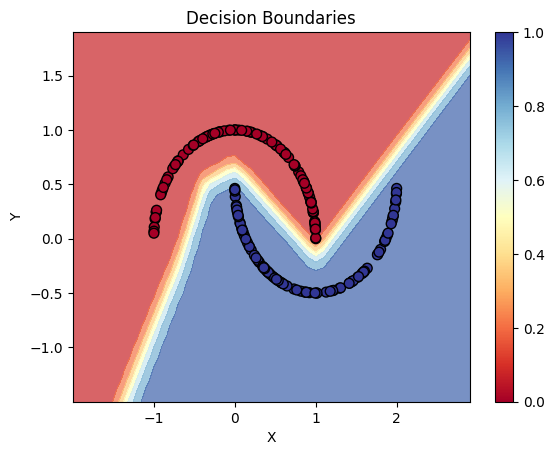

In [328]:
INPUT = 2
OUTPUT = 1

model = Model(training_data.shape[-1], OUTPUT)
train_model(model, training_data, training_labels, loops=550)
test_model(model, testing_data, testing_labels)

plot_decision_boundaries(model, testing_data, testing_labels)


In [259]:
def tanh(logits):
    (torch.exp(logits) - torch.exp(-logits)) / (torch.exp(logits) + torch.exp(-logits))

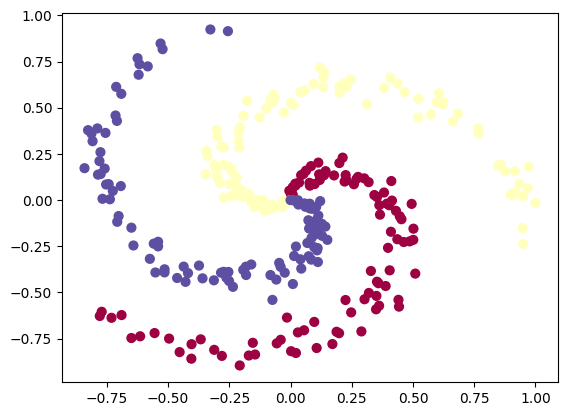

In [324]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [334]:
from torchmetrics.classification import MulticlassAccuracy

# Training function for multiclassification
def train_multiclass_model(model: torch.nn.Module, data: torch.Tensor, label: torch.Tensor, classes, loops: int):
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    
    # Train model
    model.train()
    data = shuffle(data, 17)
    label = shuffle(label, 17)
    for epoch in range(loops):
        optimizer.zero_grad()
        logits = model(data)
        loss = loss_fn(logits, label)
        loss.backward()
        optimizer.step()

        # Print the loops, loss, and accuracy every X loops
        if (epoch+1) % (loops/5) == 0:
            model.eval()
            metric = MulticlassAccuracy(num_classes=classes)

            with torch.inference_mode():
                pred = logits.softmax(1)
            accuracy = metric(pred, label) * 100

            print(f"Ran {epoch+1} loops | loss: {loss.item()} | Training Data Accuracy: {accuracy:.2f}%")

def test_multiclass_model(model: torch.nn.Module, data: torch.Tensor, label: torch.Tensor, classes):
    model.eval()
    metric = MulticlassAccuracy(classes)

    with torch.inference_mode():
        test_logits = model(data)
    
    pred = torch.softmax(test_logits, dim=1).squeeze()
    accuracy = metric(pred, label) *100
    print(f"Test Data Accuracy: {accuracy:.2f}%")

Ran 400 loops | loss: 0.950190544128418 | Training Data Accuracy: 49.67%
Ran 800 loops | loss: 0.5247728228569031 | Training Data Accuracy: 77.00%
Ran 1200 loops | loss: 0.1515215039253235 | Training Data Accuracy: 93.00%
Ran 1600 loops | loss: 0.061667513102293015 | Training Data Accuracy: 97.67%
Ran 2000 loops | loss: 0.04127243533730507 | Training Data Accuracy: 98.33%
Test Data Accuracy: 98.33%


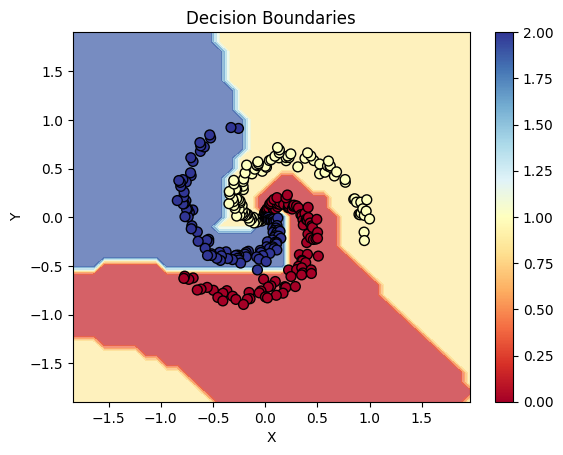

In [335]:
multiclass_model = Model(D, K)

data = torch.from_numpy(X).type(torch.FloatTensor)
labels = torch.from_numpy(y)
train_multiclass_model(multiclass_model, data, labels, K, 2000)
test_multiclass_model(multiclass_model, data, labels, K)
plot_decision_boundaries(multiclass_model, data, labels)

